In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
class ID3Dat:
    
    # Membuat fungsi untuk model klasifikasi dari data latih dan data uji yang telah ditetapkan
    def fit(self, input, output):
        data = input.copy()
        data[output.name] = output
        self.tree = self.decision_tree(data, data, input.columns, output.name)

    # Membuat fungsi predict
    def predict(self, input):
        #konversikan data input ke variabel samples
        samples = input.to_dict(orient='records')
        predictions = []

        #membuat prediksi untuk setiap sample
        for sample in samples:
            predictions.append(
                self.make_prediction(sample, self.tree, 1.0)
            )

        return predictions

    # Mengaplikasikan rumus entropy
    def entropy(self, attribute_column):
        
        # menemukan nilai unik
        values, counts = np.unique(attribute_column, return_counts=True)

        # menghitung nilai entropy sesuai dengan nilai unik yang ditemukan
        entropy_list = []

        for i in range(len(values)):
            probability = counts[i]/np.sum(counts)
            entropy_list.append(-probability*np.log2(probability))

        # menjumlahkan setiap nilai entropy
        total_entropy = np.sum(entropy_list)

        return total_entropy

    def information_gain(self, data, feature_attribute_name, target_attribute_name):
        
        # menemukan total entropy
        total_entropy = self.entropy(data[target_attribute_name])

        # menemukan nilai unik dan menghitung masing-masing frekuensi untuk dipisahkan
        values, counts = np.unique(data[feature_attribute_name], return_counts=True)

        # menghitung total entropy setiap subset
        weighted_entropy_list = []

        for i in range(len(values)):
            subset_probability = counts[i]/np.sum(counts)
            subset_entropy = self.entropy(
                data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
            weighted_entropy_list.append(subset_probability*subset_entropy)

        total_weighted_entropy = np.sum(weighted_entropy_list)

        # menghitung information gain
        information_gain = total_entropy - total_weighted_entropy

        return information_gain

    # model decision tree dengan algoritma Id3
    def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
        # jika data bersih, kembalikan nilai unik setiap subset
        class_unik = np.unique(data[target_attribute_name])
        if len(class_unik) <= 1:
            return class_unik[0]
        # jika subset kosong, kembalikan nilai unik ke data originalnya
        elif len(data) == 0:
            class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
            return np.unique(original_data[target_attribute_name])[class_index]
        # jika data set tidak mengandung nilai untuk dilatih, kembalikan nilai ke parent node class
        elif len(feature_attribute_names) == 0:
            return parent_node_class
        # jika tidak terjadi seluruh syarat diatas
        else:
            class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
            parent_node_class = class_unik[class_index]
            ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
            best_feature_index = np.argmax(ig_values)
            best_feature = feature_attribute_names[best_feature_index]

            tree = {best_feature: {}}

            feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

            parent_attribute_values = np.unique(data[best_feature])
            for value in parent_attribute_values:
                sub_data = data.where(data[best_feature] == value).dropna()
                subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, 
                                             target_attribute_name, parent_node_class)
                tree[best_feature][value] = subtree

            return tree

    # membuat fungsi untukk prediksi
    def make_prediction(self, sample, tree, default=1):
        for attribute in list(sample.keys()):
          if attribute in list(tree.keys()):
            try:
                result = tree[attribute][sample[attribute]]
            except:
                return default

            result = tree[attribute][sample[attribute]]

            if isinstance(result, dict):
                return self.make_prediction(sample, result)
            else:
                return result

In [19]:
df = pd.read_csv('D:\~~COLLAGE~~\SEMESTER 6\APM\P2\Wine.csv')
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [20]:
X = df.drop(columns="Class")
y = df["Class"]

<AxesSubplot:>

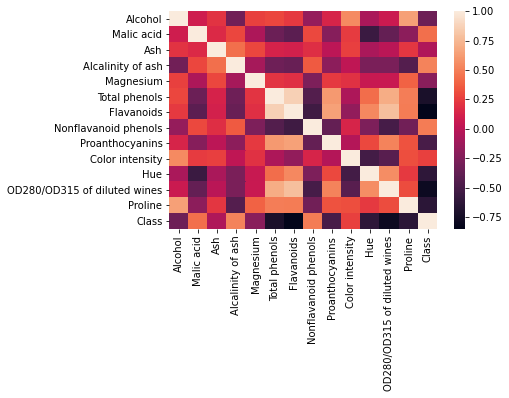

In [17]:
sns.heatmap(df.corr())

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

model = ID3Dat()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print ('Tingkat Akurasi : ', accuracy_score(y_test, y_pred)*100, '%')

Tingkat Akurasi :  61.111111111111114 %


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[12  2  0]
 [ 8  7  1]
 [ 2  1  3]]


In [18]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.55      0.86      0.67        14
           2       0.70      0.44      0.54        16
           3       0.75      0.50      0.60         6

    accuracy                           0.61        36
   macro avg       0.67      0.60      0.60        36
weighted avg       0.65      0.61      0.60        36

